In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
train = pd.read_csv('./train.csv')
train.shape

(29118021, 6)

In [5]:
train.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [9]:
print len(train.row_id.unique())
print 'Maximum of row_id %d' %max(train.row_id)

29118021
Maximum of row_id 29118020


In [10]:
print 'maximum of x %d' %max(train.x)
print 'minimum of x %d' %min(train.x)
print 'maximum of y %d' %max(train.y)
print 'minimum of y %d' %min(train.y)


maximum of x 10
minimum of x 0
maximum of y 10
minimum of y 0


In [10]:
small_sample = train.sample(frac= 0.1)

### Distribution of x and y
We can see from below x and y is very uniformly distributed.

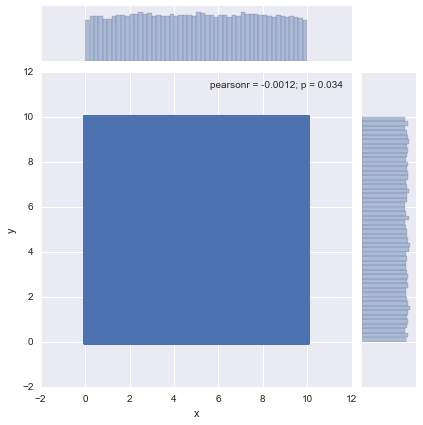

In [11]:
sns.jointplot(x = 'x',y='y', data= small_sample)

### Distribution of accuracy

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


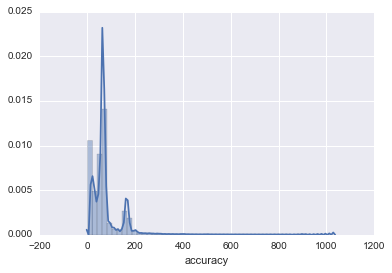

In [13]:
sns.distplot(train.accuracy)

There are three peaks so we take a closer look

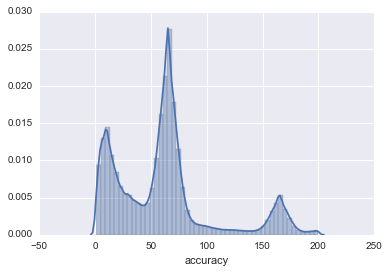

In [8]:
sample = train.sample(frac = 0.2)
filtered = sample[sample.accuracy <= 200]
sns.distplot(filtered.accuracy)

In [5]:
t = train[train.place_id == 7230349735]

In [6]:
t.shape

(1676, 6)

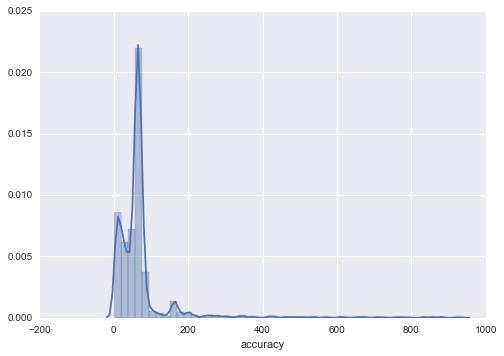

In [18]:
sns.distplot(t.accuracy)

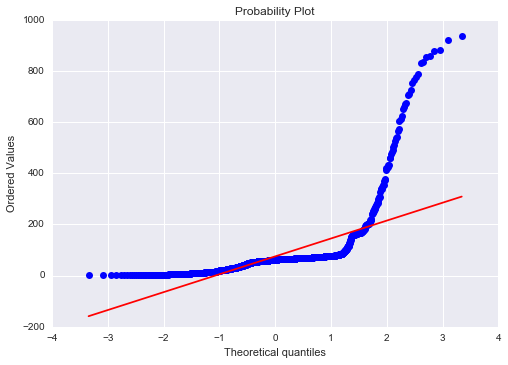

In [15]:
import scipy.stats as stats

measurements =   t.accuracy
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [109]:
### Let's see if these peaks have any relation with location
def cluster(t):
    if 0<= t<= 50: return '0<= Accuracy <50'
    if 50< t<= 100: return '50<= Accuracy <100'
    else: return '100<= Accuracy'
small_sample['cluster_acc'] = small_sample.accuracy.apply(cluster)   

#### Q: Can we get more information from high accuracy datas?

### Now we look at time, note that there are two big drops

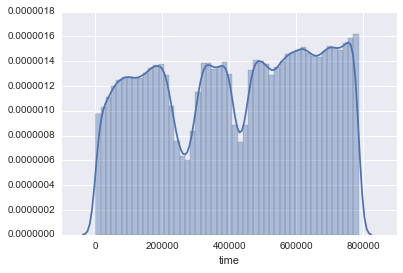

In [51]:
sns.distplot(small_sample.time)

### Look at place_id
The place_id is the place where some users check in.


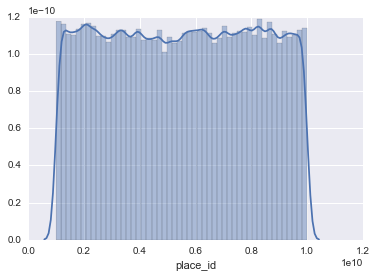

In [60]:
sns.distplot(small_sample.place_id)

In [110]:
df = small_sample.groupby('place_id').count()

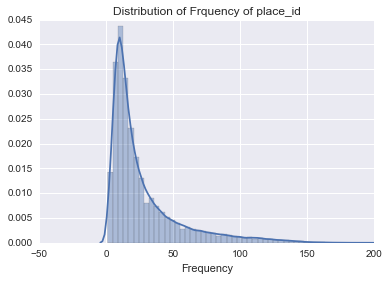

In [111]:
ax = sns.distplot(df.row_id)
ax.set(xlabel = 'Frequency')
ax.set_title('Distribution of Frquency of place_id')
plt.show()

Looks like a well shaped distribution. Considering it is the distribution of frequencies, we may want to check if it follows Poisson distribution.

In [124]:
from scipy import stats
x = stats.norm.rvs(loc=0, scale=1, size=100)

In [138]:
y = stats.poisson.rvs(mu = 1,size = 100)

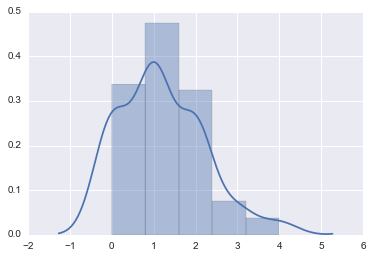

In [140]:
sns.distplot(y)

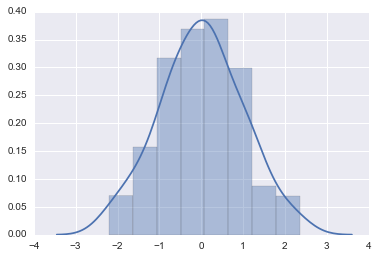

In [134]:
sns.distplot(x)

In [ ]:
stats.poisson()

In [146]:
a = stats.probplot(x,dist =stats.poisson,sparams(1,),plot =plt)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-146-e0646ad64892>, line 1)

### Take a look at top popular places
Apparently there are clustering of popular checking places in the horizontal direction.

In [116]:
# top_10
top_10_popular_places = df.sort_values(by = 'row_id', ascending=False)[:10]
top_place_id = top_10_popular_places.index
top_place = small_sample[small_sample.place_id.isin(top_place_id)]

In [184]:
top_10_popular_places

,row_id,x,y,accuracy,time,cluster_acc
place_id,,,,,,
7230349735,194,194,194,194,194,194
8772469670,192,192,192,192,192,192
4638096372,188,188,188,188,188,188
7363774279,187,187,187,187,187,187
8607353836,185,185,185,185,185,185
4774643979,182,182,182,182,182,182
4823777529,182,182,182,182,182,182
7348940462,181,181,181,181,181,181
7698408658,180,180,180,180,180,180


In [186]:
p = small_sample[small_sample.place_id == 7230349735]

In [187]:
print max(p.x)
print min(p.x)
print max(p.y)
print min(p.y)

9.4114
7.363
8.2157
8.1654


In [112]:
top_place.shape

(8706, 7)

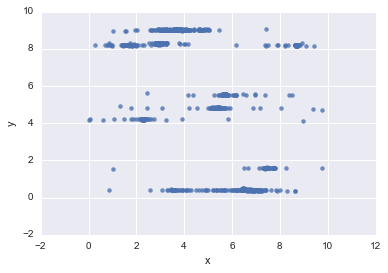

In [118]:
# top 10 places
sns.regplot(x = 'x', y = 'y', data= top_place, fit_reg= False)

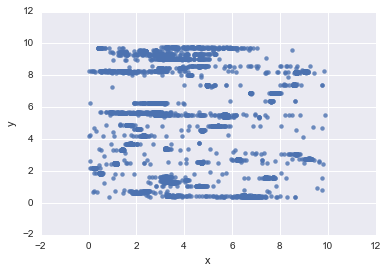

In [177]:
#top 50 places
top_50_popular_places = df.sort_values(by = 'row_id', ascending=False)[:50]
top_place_id = top_50_popular_places.index
top_place = small_sample[small_sample.place_id.isin(top_place_id)]
sns.regplot(x = 'x', y = 'y', data= top_place, fit_reg= False)

Take accuracy into consideration

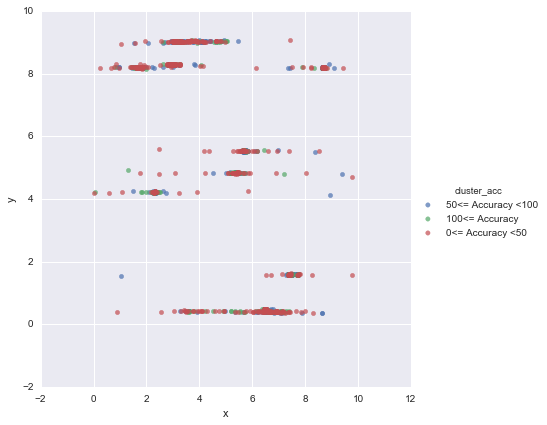

In [147]:
g = sns.FacetGrid(top_place, hue="cluster_acc", size=6)
g.map(plt.scatter, 'x', 'y', alpha=.7)
g.add_legend()

Let's look at just high accuracy points

In [153]:
high_acc = top_place[top_place.accuracy >100]

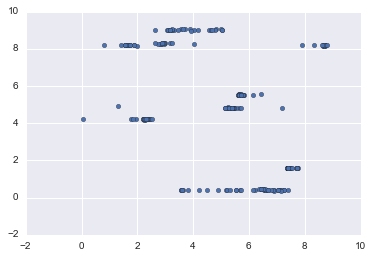

In [155]:
plt.scatter(x = high_acc.x, y = high_acc.y)

Note that above pictures are only for popular places, the places where lot of check-ins. Accuracy may have no relation to location as can be seen from the bottom picure.

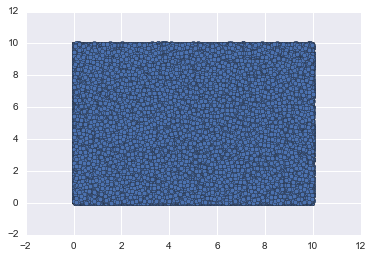

In [156]:
# If we consider high accuracy places without considering it is popular or not.
high_acc = small_sample[small_sample.accuracy > 100]
plt.scatter(x = high_acc.x, y = high_acc.y)

The variance of x is way larger than that of y


In [178]:
top_place.head()

,row_id,x,y,accuracy,time,place_id,cluster_acc
10670810,10670810,3.0440,8.4568,55,80749,9129780742,50<= Accuracy <100
10973845,10973845,5.2769,7.3801,76,229026,1593089825,50<= Accuracy <100
25435626,25435626,3.1154,8.9946,72,729619,4774643979,50<= Accuracy <100
23254466,23254466,1.9518,5.6584,24,760800,7335232411,0<= Accuracy <50
21762112,21762112,4.2363,8.0358,67,598742,5853289810,50<= Accuracy <100


In [179]:
std_xy = top_place.groupby('place_id').std()[['x','y']]

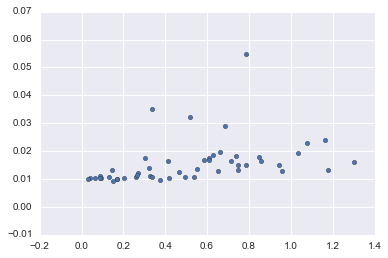

In [180]:
plt.scatter(std_xy.x,std_xy.y)

Q: Any relation between accuracy and popularity?